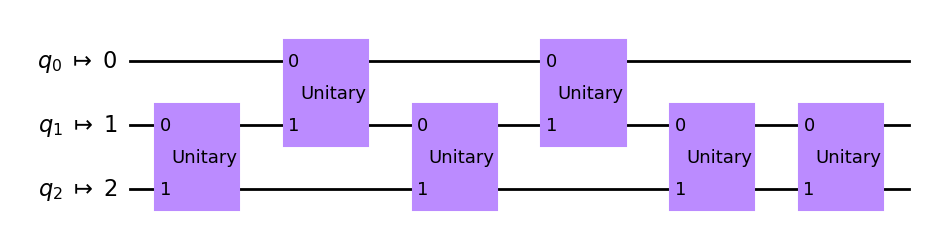

In [33]:
from virtual_swap.vswap_pass import VirtualSwap
from qiskit import QuantumCircuit

# from qiskit.test import QiskitTestCase
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import Unroller, TrivialLayout, ApplyLayout

# build a toffoli
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)

# build a 2x2 square coupling map
coupling = CouplingMap.from_line(4)

# run the pass
pm = PassManager()
# need some basic unroll and layout
pm.append([Unroller(["u", "cx"]), TrivialLayout(coupling), ApplyLayout()])
pm.append(VirtualSwap(coupling))
# set debug logging
# logging.basicConfig(level=logging.INFO)
new_circ = pm.run(qc)
new_circ.draw(output="mpl")

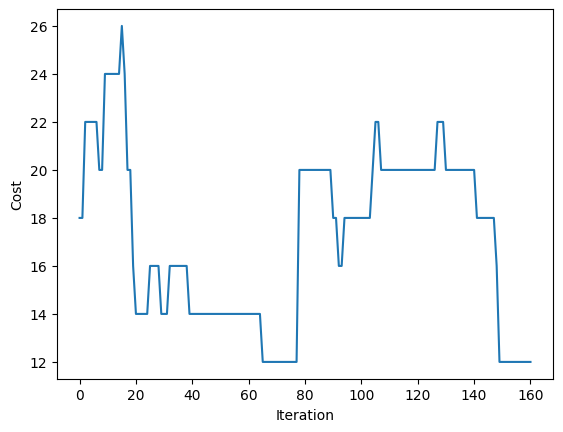

In [34]:
import matplotlib.pyplot as plt

scores = pm.property_set["scores"]
plt.plot(scores)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()